In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [21]:
df = pd.read_csv("/kaggle/input/iris-dataset/iris.csv")

In [22]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [25]:
df = df[['sepal_length','petal_length','species']]

In [26]:
df.sample(6)

,sepal_length,petal_length,species
137,6.4,5.5,2
74,6.4,4.3,1
141,6.9,5.1,2
26,5.0,1.6,0
83,6.0,5.1,1
104,6.5,5.8,2


In [27]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
clf = LogisticRegression(multi_class='multinomial')

In [33]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [36]:
y_pred = clf.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [39]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [40]:
# Prediction 
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.27439607e-01, 2.72148017e-01, 4.12375708e-04]])

In [41]:
clf.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


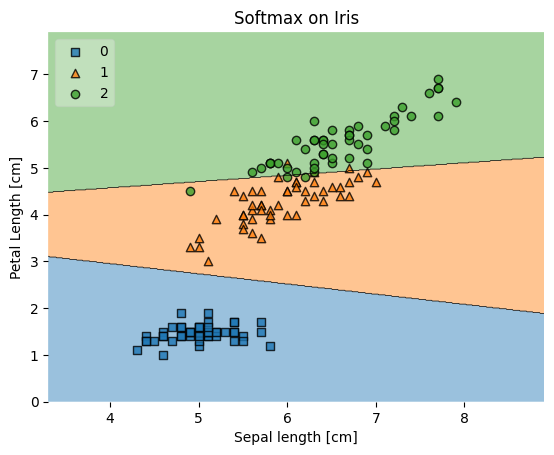

In [46]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal Length [cm]')
plt.title('Softmax on Iris')
plt.show()